# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch 
* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision 
* `torchvision.models` - get pretrained computer vision models 
* `torchvision.transforms` - function for manipulating our vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates  a python iterable over a dataset

In [1]:
import torch 
from torch import nn
import torchvision
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 
print(torch.__version__)
print(torchvision.__version__)

2.2.2+cu121
0.17.2+cu121


## 1. Getting a dataset
The dataset we'll be using FashionMNIST from torchvision.datasets

In [2]:
# Setup training data 
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first training example 
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx =train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check shape of our image 
print(f"Image shape: {image.shape} -> [color channel, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channel, height, width]
Image label: Ankle boot


## 1.2 Visualizing the data

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

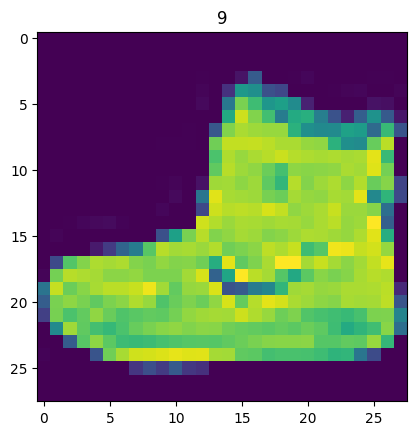

In [8]:
import matplotlib.pyplot as plt 
image, label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

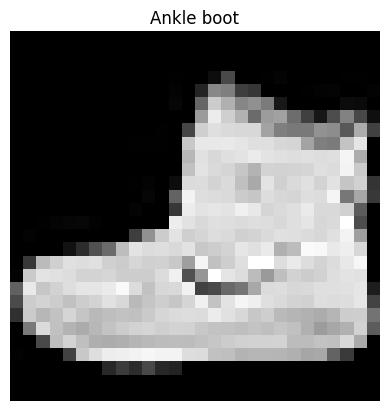

In [9]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

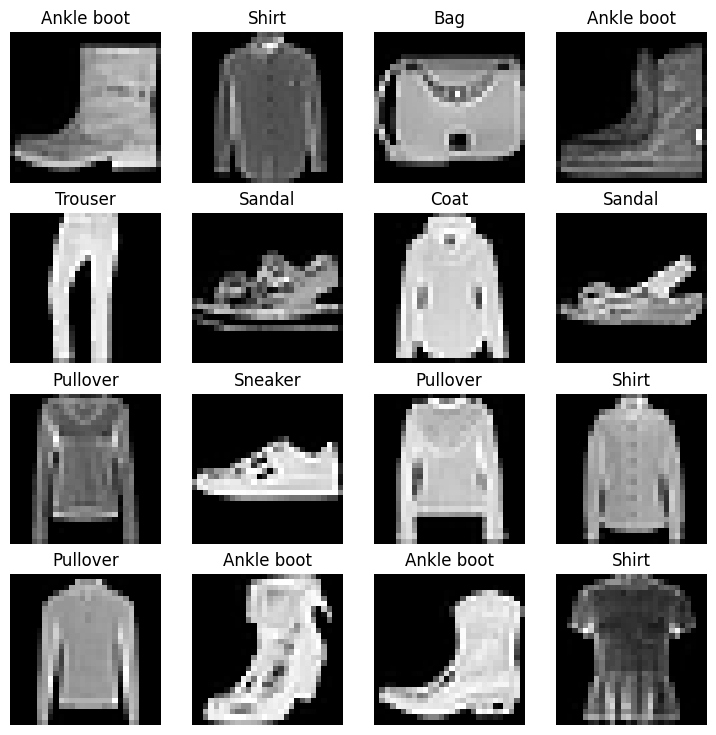

In [10]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader
DataLoader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60,000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [12]:
from torch.utils.data import DataLoader
# Setup bstch size hyperparameter 
BATCH_SIZE = 32
# Turn datasets into iterables 
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x220e76cab10>,
 <torch.utils.data.dataloader.DataLoader at 0x220e6066270>)

In [13]:
# Let's check out what we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batch of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batch of {BATCH_SIZE}")




DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000220E76CAB10>, <torch.utils.data.dataloader.DataLoader object at 0x00000220E6066270>)
Length of train_dataloader: 1875 batch of 32
Length of test_dataloader: 313 batch of 32


In [14]:
# Check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
label: 8, label size:torch.Size([])


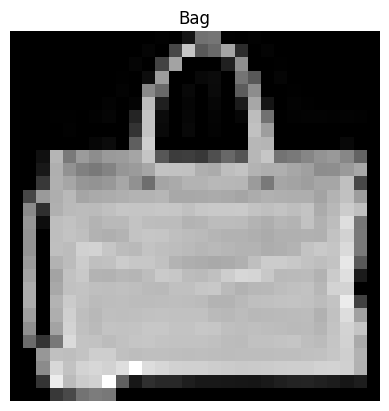

In [15]:
# Show sample 
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image size: {img.shape}")
print(f"label: {label}, label size:{label.shape}")

## 3. Model 0: Build a baseline model

In [16]:
# Create a flatten layer 
flatten_model = nn.Flatten()
# Get a single sample 
x = train_features_batch[0]
# Flatten the sample 
output = flatten_model(x)
# Print out what happend 
print(f"shape before flattening: {x.shape} -> [color, height, width]")
print(f"shape after flattening: {output.shape} -> [color, height*width]")

shape before flattening: torch.Size([1, 28, 28]) -> [color, height, width]
shape after flattening: torch.Size([1, 784]) -> [color, height*width]


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shpae: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shpae, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape) 
        )
    def forward(self,x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)
# Setup model with input parameters 
model_0 = FashionMNISTModelV0(
    input_shpae=784, # 28 * 28
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1  Setup loss, optimizer and evaluation metrics
* Loss function - since we're working with multiclass classification, loss function will be `nn.CrossEntropyLoss()` 
* Optimizer - our optimiszer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as  evaluation metric

In [21]:
import requests
from pathlib import Path 
if Path('helper_functions.py').is_file():
    print("helper_functions.py already exist, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exist, skipping download...


In [22]:
# Import accuracy metrics 
from helper_functions import accuracy_fn 
# Setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 3.2  Creating a function to time our experiments

Two main things of machine learning are:

1. Model's performance (Loss and accuracy etc)
2. How fast it runs

In [23]:
from timeit import default_timer as timer 
def print_train_time(start:float,
                     end:float,
                     device: torch.device = None):
    """Print difference between start and end time"""
    total_time = end - start 
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [24]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


1.550000160932541e-05

### 3.3 Creating a training loop and training a model on batches of data 
1. Loop through epochs.
2. Loop through training bathces, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate test loss *per batch*
4. Print whats happening
5. Time it all

In [32]:
# tqdm for progress bar 
from tqdm.auto import tqdm 
# set random seed
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epochs:{epoch}")
    # Training 
    train_loss = 0 
    # Add a loop to loop through the training batchs 
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass 
        y_pred = model_0(X)
        # 2. Calculate the loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train loss
        # 3. Optimizer zerro grad 
        optimizer.zero_grad()
        # 4. loss backward 
        loss.backward()
        # 5. Optimizer step
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader)} samples")
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    ### Testing 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test)
            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y_test)
            # 3. Calculate accuracy 
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
        # Calculate test loss and test accuracy average per batchh 
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")
# Calculate training time 
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs:0
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epochs:1
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epochs:2
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 13.017 seconds


In [31]:
str(next(model_0.parameters()).device)

'cpu'

In [34]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.dataloader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
        """Return a dictionary containing the results of model predicting on data_loader."""
        loss, acc = 0, 0 
        model.eval()
        with torch.inference_mode():
            for X,y in tqdm(data_loader):
                #Make predictions
                y_pred = model(X)
                # Accumulate the loss and acc values per batch 
                loss += loss_fn(y_pred, y)
                acc += accuracy_fn(y, y_pred.argmax(dim=1))
            # Scale loss and acc to find average loss/acc per batch
            loss /= len(data_loader)
            acc /= len(data_loader)
        return {"model_name": model.__class__.__name__,
             "model_loss": loss.item(),
             "model_acc": acc}
# Calculate model 0 results on test dataset 
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup  device agnostic-code (for using a GPU if there is one)

In [35]:
# Setup device-agnostic code 
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [37]:
# Lets create model with linear and non-linear layers 
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, X:torch.Tensor):
        return self.layer_stack(X)
    

In [39]:
# Create instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [40]:
# Setup the loss and accuracy fucntion 
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [42]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    """Performs a training with model trying to learn on data loader"""
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X,y) in enumerate(data_loader):
        # Put data on target device 
        X, y = X.to(device), y.to(device)
        # 1. Forward pass 
        y_pred = model(X)
        # 2. Calculate the loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
        # 3. Optimizer zero grad 
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step 
        optimizer.step()
    # Divide total train loss and acc by length of the train dataloader 
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [43]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    """Performs a Testomg loop step on model going over data_loader"""
    ### Testing 
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # Data to device
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model(X)
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
        # Calculate test loss and accuracy average per batch 
        test_loss /= len(data_loader)         
        test_acc /= len(data_loader)      
        # Print out what's happening
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")   


In [46]:
torch.manual_seed(42)
# Measure time 
from timeit import default_timer as timer 
train_time_start_on_gpu = timer()
epochs = 3
# Create a optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               optimizer=optimizer,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.67074 | Train acc: 75.98%

Test loss: 0.70416 | Test acc: 74.79%

Epoch: 1
-------
Train loss: 0.64310 | Train acc: 76.61%

Test loss: 0.68131 | Test acc: 75.24%

Epoch: 2
-------
Train loss: 0.62648 | Train acc: 77.05%

Test loss: 0.65971 | Test acc: 75.94%

Train time on cuda: 13.921 seconds


In [47]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [48]:
total_train_time_model_0

13.01675909999176

In [51]:
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
    """Return a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [52]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6597086191177368,
 'model_acc': 75.93849840255591}

In [53]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Networ (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data

In [60]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG.
    model from CNN explainer website.
    """
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            # Create a conv layer
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            # Create a max pool layer
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7* 7, # Trick to calculate this get warnings.warn("Initializing zero-element tensors is a no-op")
                     out_features=output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [61]:
torch.manual_seed(2)
model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [62]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor

tensor([[[-4.5595e-02,  3.5251e-01, -7.2400e-01,  7.8644e-01, -1.7009e+00,
          -3.3818e-01, -6.6032e-01,  2.5603e+00,  4.0503e-01,  1.2958e+00,
          -3.3247e-01,  9.3508e-02, -3.1299e+00,  1.0384e-01, -4.3990e-01,
          -1.0184e-01,  5.1080e-01,  8.4546e-01,  1.2579e+00, -8.2876e-01,
          -8.0847e-01, -4.4036e-01, -7.5850e-01,  1.2918e+00, -2.4717e+00,
           2.6387e-01,  3.5509e-01,  2.0810e+00],
         [-2.0480e+00,  1.1735e-01,  2.0716e-01,  7.2815e-01, -1.4683e-01,
          -1.6876e+00, -5.5313e-01,  1.3233e+00,  2.3121e+00,  8.6946e-01,
           2.9567e-03, -3.2904e-01,  2.6476e+00, -5.1289e-01,  1.3089e+00,
           1.9217e+00, -8.1873e-01,  3.8066e-01, -1.0378e+00,  3.9682e-01,
          -1.0075e+00, -7.2002e-01, -1.1371e+00, -6.3887e-02, -1.5662e-01,
          -2.3808e-01,  4.2858e-01,  6.8970e-01],
         [-1.3232e+00, -5.0409e-01, -5.4434e-03,  9.9417e-01, -1.9988e+00,
           3.0070e-01,  6.4729e-01, -2.2313e-01, -9.0359e-01,  1.0664e+00,


In [63]:
# pass image through model 
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0067, -0.0388, -0.0725,  0.0164, -0.0109, -0.0820, -0.1598,  0.0115,
          0.0603,  0.0190]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [64]:
torch.manual_seed(42)
# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

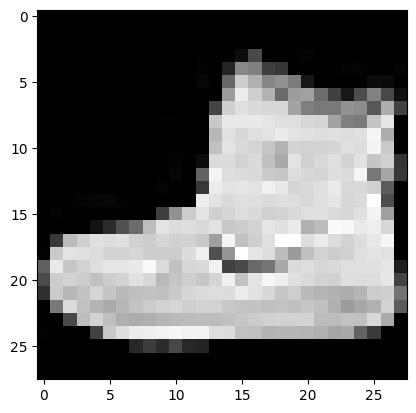

In [65]:
plt.imshow(image.squeeze(0), cmap="gray")

In [66]:
test_image.shape

torch.Size([3, 64, 64])

In [67]:
torch.manual_seed(42)
# Create a single Conv2d laye 
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0)
# Pass data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 stepping through `nn.MaxPool2d`

In [69]:
print(f"Image shape:{test_image.shape}")
print(f"Image shape with unsqueezed:{test_image.unsqueeze(0).shape}")
# Create the sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
#Pass data through cpmv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after  going through conv_layer: {test_image_through_conv.shape}")
# Pass data through the max pool layer 
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Image shape:torch.Size([3, 64, 64])
Image shape with unsqueezed:torch.Size([1, 3, 64, 64])
Shape after  going through conv_layer: torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [70]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:{random_tensor}")
print(f"\nRandom tensor shape:{random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:{max_pool_tensor}")
print(f"\nMax pool tensor shape:{max_pool_tensor.shape}")


Random tensor:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape:torch.Size([1, 1, 2, 2])

Max pool tensor:tensor([[[[0.3367]]]])

Max pool tensor shape:torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [71]:
# Setup loss function/eval metrics/ optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [72]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.0765, -0.0793,  0.0914],
                        [-0.0170,  0.1424,  0.0794],
                        [-0.0383, -0.2695,  0.0761]]],
              
              
                      [[[-0.2951,  0.0438,  0.0222],
                        [-0.0733,  0.2726,  0.0222],
                        [ 0.1382,  0.1411, -0.1966]]],
              
              
                      [[[-0.1281,  0.3206, -0.3265],
                        [-0.0226, -0.0264,  0.2364],
                        [-0.0317,  0.0878, -0.0160]]],
              
              
                      [[[-0.1866, -0.1889, -0.1619],
                        [-0.3028, -0.2163,  0.0784],
                        [ 0.2194,  0.0164, -0.1528]]],
              
              
                      [[[ 0.1465, -0.1280, -0.0738],
                        [-0.1827, -0.1047, -0.3089],
                        [ 0.1422,  0.1296,  0.0662]]],
              
              
      

In [73]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()
# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.56844 | Train acc: 79.49%

Test loss: 0.39979 | Test acc: 85.61%

Epoch: 1
-------
Train loss: 0.35340 | Train acc: 87.42%

Test loss: 0.34212 | Test acc: 87.39%

Epoch: 2
-------
Train loss: 0.31724 | Train acc: 88.59%

Test loss: 0.32040 | Test acc: 88.61%

Train time on cuda: 29.070 seconds


# Get model_2 results

In [77]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32039979100227356,
 'model_acc': 88.6082268370607}

In [74]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [75]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6597086191177368,
 'model_acc': 75.93849840255591}

## 8. Compare model results and training  time

In [78]:
import pandas as pd 
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.659709,75.938498
2,FashionMNISTModelV2,0.320400,88.608227


In [79]:
# Add training time to results comparision
compare_results["training_time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,13.016759
1,FashionMNISTModelV1,0.659709,75.938498,13.921400
2,FashionMNISTModelV2,0.320400,88.608227,29.070355


Text(0, 0.5, 'model')

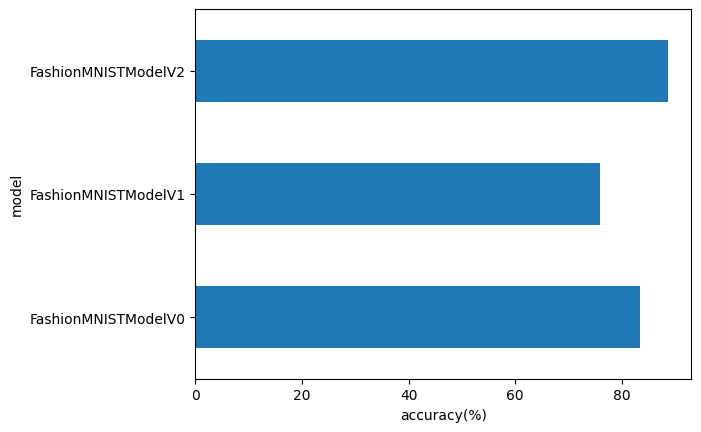

In [80]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## 9. Make and evaluate random prediction with best model

In [81]:
def make_predictions(model:torch.nn.Module,
                   data: list,
                   device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # Forward pass (model outputs raw logist)
            pred_logit = model(sample)
            # Get prediction probability (logit -> pred probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # Get pred _prob off the GPU for the futher calculations
            pred_probs.append(pred_prob.cpu())
    # Stack the pred_prob to turn list into a tensor 
    return torch.stack(pred_probs)

In [86]:
import random 
# random.seed(42)
test_samples = []
test_labels = [] 
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
# View first sample shape 
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

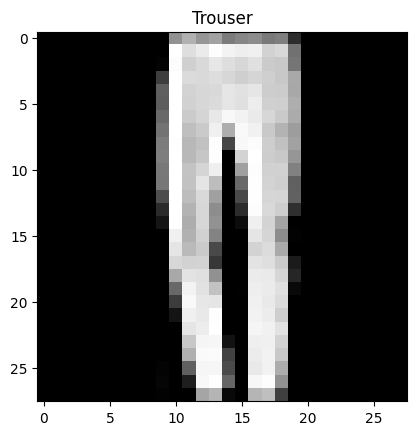

In [87]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [88]:
# Make predictions 
pred_probs = make_predictions(model=model_2,
                             data=test_samples)
# View first 2 prediction probabilities
pred_probs[:2]

tensor([[6.5240e-05, 9.9978e-01, 9.4694e-07, 8.5320e-05, 5.4260e-05, 2.4537e-06,
         4.5967e-06, 1.1398e-07, 4.1247e-06, 1.7496e-07],
        [2.9954e-03, 2.1773e-02, 7.4153e-05, 9.7247e-01, 1.5601e-03, 1.8893e-05,
         5.1355e-04, 1.0389e-04, 2.9367e-04, 1.9738e-04]])

In [89]:
# Convert  prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 3, 2, 8, 3, 4, 9, 9, 1])

In [90]:
test_labels

[1, 3, 2, 8, 3, 4, 9, 9, 1]

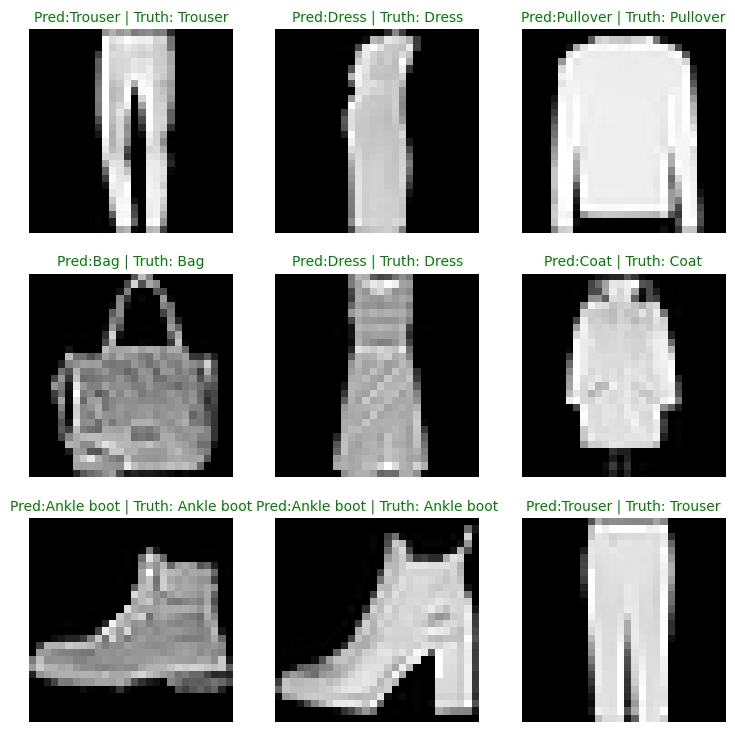

In [92]:
# Plot predictions 
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, samples in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)
    # Plot the target image
    plt.imshow(samples.squeeze(), cmap="gray")
    # Find prediction (in text form e.g:"Sandal")
    pred_label = class_names[pred_classes[i]]
    # Get the turth label (in text form)
    truth_label = class_names[test_labels[i]]
    # Create a title for the plot 
    title_text = f"Pred:{pred_label} | Truth: {truth_label}"
    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else: 
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False)

# 10. Making a confusion matrix for futher prediction evaluation

1. Make prediction with out trained model of the test dataset
2. Make a confusion matric for `torchmetrics.ConfusionMatrix()`
3. Plot the  confusion matric using `mlxtend.plotting.plot_confusion_matrix()`

In [93]:
from tqdm.auto import tqdm
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making preictions....."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logits = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # Predictions on cpu 
        y_preds.append(y_pred.cpu())
# Concatenate list  of predictions into a tensor 

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making preictions.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [94]:
len(y_pred_tensor)

10000

In [97]:
import torchmetrics, mlxtend
torchmetrics.__version__, mlxtend.__version__

('1.3.2', '0.23.1')

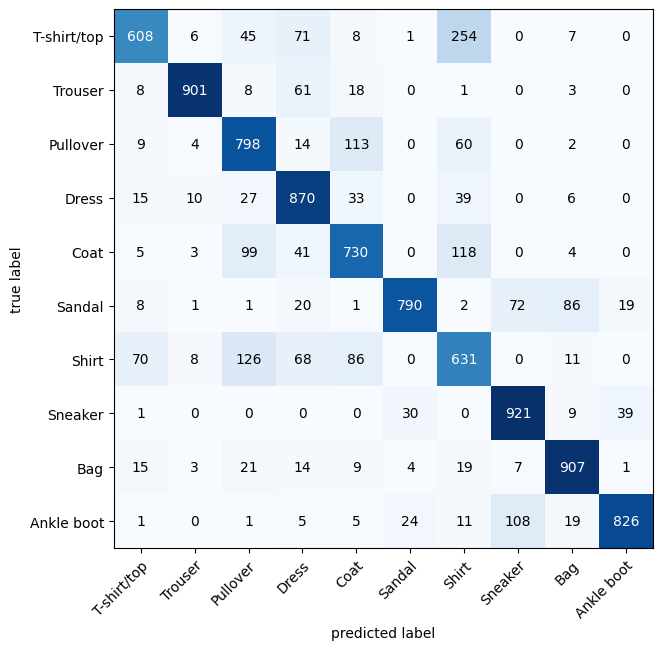

In [98]:
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix
# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets) 
# 3. Plot the confusion matric
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [99]:
from pathlib import Path 
# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)
# Create model save 
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
# Save the model state dict 
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to : models\03_pytorch_computer_vision_model_2.pth


In [100]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names)) 
# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Send model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [101]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32039979100227356,
 'model_acc': 88.6082268370607}

In [102]:
# Evaluate loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32039979100227356,
 'model_acc': 88.6082268370607}

In [103]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)

In [104]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

3.0%

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100.0%
100.0%
100.0%

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [105]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [106]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [107]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [109]:
train_data.targets.shape

torch.Size([60000])

In [110]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [111]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x22117adeb70>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x22117d4a4b0>}

In [112]:
from torch import nn
import torch.nn.functional as F 
import torch.optim as optim

In [119]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                               out_channels=10,
                               kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(in_features=320,
                             out_features=50)
        self.fc2 = nn.Linear(50,10)
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)
        return F.softmax(x, dim=1)

In [120]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [121]:
def train(epoch):
    model.train()
    for batch_idx, (data,target) in enumerate(loaders["train"]):
        data,target=data.to(device), target.to(device)
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx%20==0:
            print(f"Epoch: {epoch}[{batch_idx*len(data)}/{len(loaders['train'].dataset)}({100.*batch_idx/len(loaders['train'].dataset):.0f}%)]\t{loss.item():.6f}")
def test(epoch):
    model.eval()
    test_loss=0
    correct=0
    with torch.inference_mode():
        for data, target in loaders["test"]:
            data,target=data.to(device), target.to(device)
            output=model(data)
            test_loss += loss_fn(output,target).item()
            pred=output.argmax(dim=1,keepdim=True)
            correct+=pred.eq(target.view_as(pred)).sum().item()
    test_loss/=len(loaders["test"].dataset)
    print(f"\nTest set: Average loss:{test_loss:.4f}, Accuracy:{correct}/{len(loaders['test'].dataset)}({100.*correct/len(loaders['test'].dataset):.0f}%)")
            

In [122]:
for epoch in range(1,11):
    train(epoch)
    test(epoch)

Epoch: 1[0/60000(0%)]	2.302451
Epoch: 1[2000/60000(0%)]	2.277496
Epoch: 1[4000/60000(0%)]	2.118422
Epoch: 1[6000/60000(0%)]	2.029901
Epoch: 1[8000/60000(0%)]	1.938369
Epoch: 1[10000/60000(0%)]	1.849252
Epoch: 1[12000/60000(0%)]	1.781682
Epoch: 1[14000/60000(0%)]	1.844573
Epoch: 1[16000/60000(0%)]	1.794070
Epoch: 1[18000/60000(0%)]	1.780917
Epoch: 1[20000/60000(0%)]	1.725738
Epoch: 1[22000/60000(0%)]	1.664475
Epoch: 1[24000/60000(0%)]	1.722915
Epoch: 1[26000/60000(0%)]	1.719745
Epoch: 1[28000/60000(0%)]	1.684502
Epoch: 1[30000/60000(0%)]	1.760965
Epoch: 1[32000/60000(1%)]	1.681257
Epoch: 1[34000/60000(1%)]	1.651320
Epoch: 1[36000/60000(1%)]	1.700146
Epoch: 1[38000/60000(1%)]	1.680980
Epoch: 1[40000/60000(1%)]	1.671350
Epoch: 1[42000/60000(1%)]	1.662535
Epoch: 1[44000/60000(1%)]	1.705662
Epoch: 1[46000/60000(1%)]	1.686348
Epoch: 1[48000/60000(1%)]	1.661647
Epoch: 1[50000/60000(1%)]	1.609253
Epoch: 1[52000/60000(1%)]	1.647561
Epoch: 1[54000/60000(1%)]	1.628210
Epoch: 1[56000/60000(1%)]	1.

prediction:7


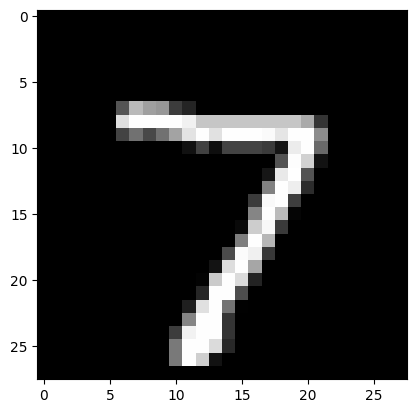

In [123]:
import matplotlib.pyplot as plt 
model.eval()
data,target = test_data[0]
data=data.unsqueeze(0).to(device)
output=model(data)
prediction=output.argmax(dim=1,keepdim=True).item()
print(f"prediction:{prediction}")
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap="gray")
plt.show()